In [2]:
from keras.models import model_from_json
import soundfile as sf
import librosa
import numpy as np
import pandas as pd
import os
import csv, operator
from sklearn.preprocessing import MinMaxScaler

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [60]:
scaler=MinMaxScaler()
directorio="./model/rentreno"
json_file = open(directorio+'/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(directorio+"/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [62]:
def calmfccs(audio, sampleRate):
    try:
        X = librosa.resample(audio, sampleRate, 22050)
        mfccs = np.mean(librosa.feature.mfcc(
            y=X, sr=sampleRate, n_mfcc=40).T, axis=0)
    except Exception as e:
        print("Error en el audio: {}".format(e))
        return "Error"
    return mfccs

In [63]:
csvsalida = open('salidat.csv', 'w', newline='')
salida = csv.writer(csvsalida)
salida.writerow(['audio','categoria','predict','seguridad','predict_letras'])
porcentage = ["0% a 20%", "20% a 100%"]
ruta = "./reverse"
directs = os.listdir(ruta)
for direct in directs:
    audios  = os.listdir("{}/{}".format(ruta,direct))
    for audio in audios:
        data, sample_rate = sf.read("{}/{}/{}".format(ruta,direct,audio))
        mfccs = calmfccs(data, sample_rate)
        data = pd.DataFrame({'feature': [mfccs]})
        X = np.array(data.feature.tolist())
        y_pred = loaded_model.predict(X)
        valores = []
        for val in y_pred[0]:
            procentage = round(val * 100,2)
            valores.append(procentage)
        #print("{}--{}".format(valores,sum(valores)))
        listSum = (max(valores) - min(valores))
        print('{}% - {} - {}'.format(round(listSum,2),porcentage[int(y_pred.argmax(axis=1))],direct))
        salida.writerow([audio,direct,int(y_pred.argmax(axis=1)),round(listSum,2),porcentage[int(y_pred.argmax(axis=1))]])

del salida
csvsalida.close()
print("Writing complete")

100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000


100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
34.78% - 0% a 20% - _000
80.88% - 20% a 100% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 20% a 100% - _000
100.0% - 20% a 100% - _000
68.24% - 0% a 20% - _000
85.96% - 0% a 20% - _000
81.18% - 0% a 20% - _000
99.96% - 0% a 20% - _000
98.58% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% - _000
100.0% - 0% a 20% -

100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
97.82% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
98.72% - 20% a 100% - _010
99.94% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
99.56% - 20% a 100% - _010
1

99.98% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
99.9% - 0% a 20% - _010
100.0% - 0% a 20% - _010
100.0% - 20% a 100% - _010
100.0% - 0% a 20% - _010
100.0% - 0% a 20% - _010
99.66% - 20% a 100% - _010
94.0% - 0% a 20% - _010
99.9% - 0% a 20% - _010
100.0% - 20% a 100% - _010
95.88% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
81.96% - 20% a 100% - _010
99.5% - 20% a 100% - _010
100.0% - 20% a 100% - _010
100.0% - 20% a 100% - _010
86.5% - 20% a 100% - _010
99.7% - 20% a 100% - _010
98.76% - 20% a 100% - _010
88.24% - 20% a 100% - _010
99.98% - 20% a 100% - _010
100.0% - 20% a 100% - _010
99.98% - 20% a 100% - _010
99.54% - 20% a 100% - _010
100.0% - 20% a 100% - _010
97.74% - 20% a 100% - _010
100.0% - 20% a 100% - _010
99.92% - 20% a 100% - _010
61.5% - 20% a 100% - _010
99.54% - 20% a 100% - _010
100.0% - 

100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020


100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
0.24% - 20% a 100% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020
100.0% - 0% a 20% - _020

99.96% - 20% a 100% - _020
57.84% - 0% a 20% - _020
51.4% - 0% a 20% - _020
99.72% - 20% a 100% - _020
99.86% - 0% a 20% - _020
95.66% - 0% a 20% - _020
99.64% - 20% a 100% - _020
99.98% - 20% a 100% - _020
63.52% - 0% a 20% - _020
99.82% - 20% a 100% - _020
99.62% - 20% a 100% - _020
99.84% - 20% a 100% - _020
79.1% - 20% a 100% - _020
99.94% - 20% a 100% - _020
98.66% - 20% a 100% - _020
99.62% - 20% a 100% - _020
99.98% - 20% a 100% - _020
100.0% - 20% a 100% - _020
69.54% - 0% a 20% - _020
100.0% - 0% a 20% - _020
7.68% - 20% a 100% - _020
99.92% - 20% a 100% - _020
93.22% - 20% a 100% - _020
100.0% - 20% a 100% - _020
100.0% - 20% a 100% - _020
95.76% - 20% a 100% - _020
99.98% - 20% a 100% - _020
99.02% - 20% a 100% - _020
99.94% - 20% a 100% - _020
100.0% - 20% a 100% - _020
98.9% - 20% a 100% - _020
99.98% - 0% a 20% - _020
68.68% - 0% a 20% - _020
99.5% - 0% a 20% - _020
100.0% - 0% a 20% - _020
46.98% - 20% a 100% - _020
99.12% - 20% a 100% - _020
99.56% - 20% a 100% - _020
1

99.34% - 20% a 100% - _030
100.0% - 20% a 100% - _030
32.46% - 20% a 100% - _030
30.0% - 0% a 20% - _030
71.36% - 0% a 20% - _030
89.7% - 0% a 20% - _030
58.82% - 0% a 20% - _030
66.22% - 0% a 20% - _030
98.52% - 0% a 20% - _030
3.38% - 20% a 100% - _030
90.46% - 0% a 20% - _030
77.54% - 0% a 20% - _030
72.42% - 0% a 20% - _030
99.66% - 20% a 100% - _030
96.56% - 20% a 100% - _030
77.64% - 20% a 100% - _030
99.24% - 20% a 100% - _030
100.0% - 0% a 20% - _030
21.94% - 0% a 20% - _030
98.12% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
96.2% - 20% a 100% - _030
98.1% - 20% a 100% - _030
100.0% - 20% a 100% - _030
99.86% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
99.48% - 20% a 100% - _030
64.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
99.94% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
100.0% - 20% a 100% - _030
10

100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
80.9% - 20% a 100% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 20% a 100% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
81.66% - 0% a 20% - _040
59.66% - 20% a 100% - _040
14.0% - 0% a 20% - _040
3.06% - 20% a 100% - _040
99.64% - 20% a 100% - _040
99.98% - 0% a 20% - _040
99.56% - 0% a 20% - _040
74.86% - 0% a 20% - _040
100.0% - 0% a 20% - _040
41.84% - 0% a 20% - _040
100.0% - 0% a 20% - _040
96.62% - 0% a 20% - _040
100.0% - 0% a 20% 

99.02% - 20% a 100% - _040
99.98% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.3% - 0% a 20% - _040
99.5% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.98% - 0% a 20% - _040
99.88% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.92% - 0% a 20% - _040
100.0% - 0% a 20% - _040
15.9% - 20% a 100% - _040
77.6% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.98% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
97.06% - 0% a 20% - _040
64.68% - 20% a 100% - _040
99.58% - 20% a 100% - _040
96.84% - 0% a 20% - _040
33.48% - 0% a 20% - _040
100.0% - 0% a 20% - _040
86.7% - 20% a 100% - _040
43.52% - 0% a 20% - _040
25.64% - 0% a 20% - _040
100.0% - 0% a 20% - _040
23.68% - 0% a 20% - _040
92.3% - 0% a 20% - _040
99.96% - 0% a 20% - _040
98.9% - 20% a 100% - _040
100.0% - 0% a 20% - _040
96.54% - 0% a 20% - _040
99.9% - 20% a 100% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.98% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% -

100.0% - 20% a 100% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.5% - 20% a 100% - _040
100.0% - 0% a 20% - _040
99.96% - 0% a 20% - _040
99.98% - 0% a 20% - _040
93.64% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.6% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
11.76% - 0% a 20% - _040
100.0% - 0% a 20% - _040
25.82% - 20% a 100% - _040
99.98% - 0% a 20% - _040
97.02% - 20% a 100% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
99.98% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% - _040
100.0% - 0% a 20% -

100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
82.04% - 20% a 100% - _060
99.98% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
99.98% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
99.84% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
52.3% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
100.0% - 20% a 100% - _060
99.98% - 20% a 100% - _060
10

100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
99.98% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
99.92% - 20% a 100% - _080
99.98% - 20% a 100% - _080
99.86% - 20% a 100% - _080
99.14% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
100.0% - 20% a 100% - _080
1

100.0% - 20% a 100% - _100
100.0% - 20% a 100% - _100
100.0% - 20% a 100% - _100
100.0% - 20% a 100% - _100
100.0% - 20% a 100% - _100
Writing complete


In [67]:
# ANALIZAR RESULTADOS DEL MODELO

df = pd.read_csv('./salidat.csv')

In [68]:
df.count()

audio             4132
categoria         4132
predict           4132
seguridad         4132
predict_letras    4132
dtype: int64

In [44]:
df.mean()

predict       0.682462
seguridad    95.155072
dtype: float64

In [69]:
for i in range(0,len(df)):
    if df.loc[i,'seguridad'] >= 90:
        df.loc[i,'porcentaje'] = int(1)
    else:
        df.loc[i,'porcentaje'] = int(2)

/Users/exxact/Documents/abastible/.env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


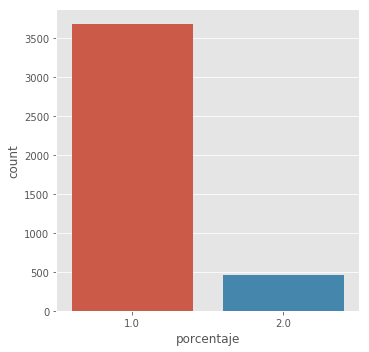

In [70]:
sb.factorplot('porcentaje',data=df,kind="count")

In [71]:
df.groupby(['porcentaje']).size()

porcentaje
1.0    3677
2.0     455
dtype: int64

In [72]:
#INCORRECTAS
csvsalida = open('predict-incorrectas.csv', 'w', newline='')
salida = csv.writer(csvsalida)
salida.writerow(['audio','categoria','seguridad','predict','type'])
category_0 = ['000','010','020']
category_1 = ['030','040','050','060','070','080','090','100']

alto = df.loc[0,'categoria']
for i in range(0,len(df)):
    if df.loc[i,'categoria'][1:4] in category_0 and df.loc[i,'predict'] == 1:
        salida.writerow([df.loc[i,'audio'],df.loc[i,'categoria'],df.loc[i,'seguridad'],df.loc[i,'predict'],df.loc[i,'porcentaje']])

    if df.loc[i,'categoria'][1:4] not in category_0 and df.loc[i,'predict'] == 0:
        salida.writerow([df.loc[i,'audio'],df.loc[i,'categoria'],df.loc[i,'seguridad'],df.loc[i,'predict'],df.loc[i,'porcentaje']])

del salida
csvsalida.close()
print("Writing complete")

Writing complete


In [73]:
#CORRECTAS
csvsalida = open('predict-correctas.csv', 'w', newline='')
salida = csv.writer(csvsalida)
salida.writerow(['audio','categoria','seguridad','predict','type'])
category_0 = ['000','010','020']
category_1 = ['030','040','050','060','070','080','090','100']

alto = df.loc[0,'categoria']
for i in range(0,len(df)):
    if df.loc[i,'categoria'][1:4] in category_0 and df.loc[i,'predict'] == 0:
        salida.writerow([df.loc[i,'audio'],df.loc[i,'categoria'],df.loc[i,'seguridad'],df.loc[i,'predict'],df.loc[i,'porcentaje']])

    if df.loc[i,'categoria'][1:4]  in category_1 and df.loc[i,'predict'] == 1:
        salida.writerow([df.loc[i,'audio'],df.loc[i,'categoria'],df.loc[i,'seguridad'],df.loc[i,'predict'],df.loc[i,'porcentaje']])

del salida
csvsalida.close()
print("Writing complete")

Writing complete


In [74]:
# dataframe de audios correctos e incorrectos
df_correctas  = pd.read_csv('./predict-correctas.csv')
df_incorrecto = pd.read_csv('./predict-incorrectas.csv')

In [77]:
len(df_correctas)

2487

/Users/exxact/Documents/abastible/.env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


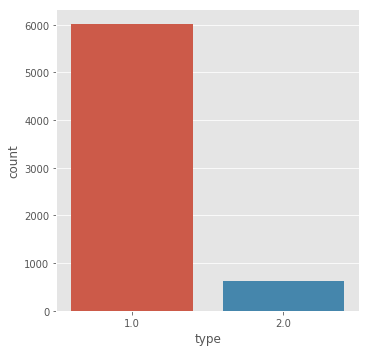

In [52]:
# predicción - perdida de valores buenos con mensaje
sb.factorplot('type',data=df_correctas,kind="count")

In [76]:
df_correctas.groupby(['categoria','type']).size()

categoria  type
_000       1.0     430
           2.0      26
_010       1.0     122
           2.0      21
_020       1.0     647
           2.0      35
_030       1.0     155
           2.0      16
_040       1.0     191
           2.0      62
_050       1.0      85
           2.0      20
_060       1.0     138
           2.0       7
_070       1.0     149
           2.0      14
_080       1.0     120
           2.0       2
_090       1.0     121
_100       1.0     126
dtype: int64

/Users/exxact/Documents/abastible/.env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


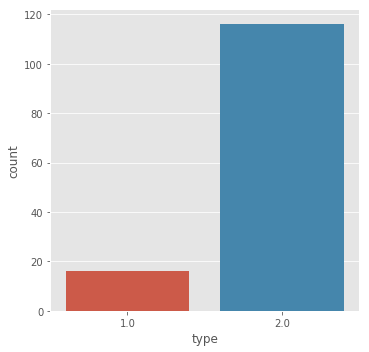

In [54]:
# predicción - posibles mensajes recuperados con mensajes
sb.factorplot('type',data=df_incorrecto,kind="count")

In [55]:
df_incorrecto.groupby(['categoria','type']).size()

categoria  type
_000       2.0     18
_010       1.0      2
           2.0     27
_020       1.0      9
           2.0     16
_030       1.0      1
           2.0     20
_040       1.0      2
           2.0     20
_050       2.0      5
_060       2.0      5
_070       2.0      1
_080       1.0      2
           2.0      3
_090       2.0      1
dtype: int64

In [35]:
#PREDICCIONES ERRONEAS
sb.factorplot('predict',data=df_audio,kind="count")

NameError: name 'df_audio' is not defined

/Users/exxact/Documents/abastible/.env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


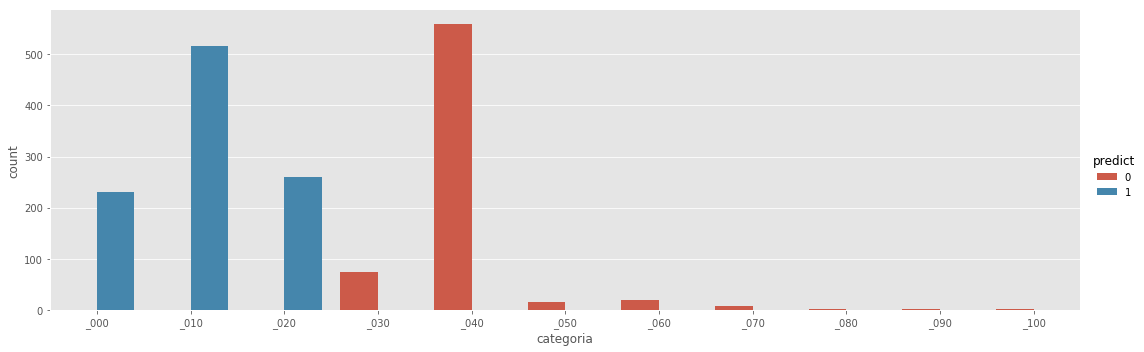

In [36]:
##COMPARACIÓN DE CATEGORÍA CON ERRORES
sb.factorplot('categoria',data=df_incorrecto,hue='predict',kind="count" ,aspect=3)

In [78]:
df_incorrecto.groupby(['predict','categoria']).size()

predict  categoria
0        _030         130
         _040         689
         _050          18
         _060          26
         _070           9
         _080           4
         _090           3
1        _000          90
         _010         480
         _020         196
dtype: int64

In [282]:
df_audio.count()

audio        130
categoria    130
seguridad    130
predict      130
dtype: int64

In [104]:
#borrar predicciones incorrectas del set de datos de la carpeta referenciada
for i in range(0,len(df_audio)):
    os.remove("./seleccion-audios-predict/{}/{}".format(df_audio.loc[i,'categoria'],df_audio.loc[i,'audio']))
print("Listo.")

Listo.
